<a href="https://colab.research.google.com/github/hungsvdut2k2/DSP/blob/main/XLTHS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import os
import sklearn
from google.colab import files

**Bai 2**

In [ ]:
SAMPLE_DIR = r"/content/drive/MyDrive/Datasets/NguyenAmHuanLuyen-16k"

In [ ]:
def iterator_for_all_sub_directories(directory):
    files_path = {"a.wav": [], "e.wav": [], "i.wav": [], "o.wav": [], "u.wav": []}
    for sub_directory in os.scandir(directory):
        for file in os.scandir(sub_directory):
            splitted_file_path = file.path.split("/")
            files_path[splitted_file_path[-1]].append(file.path)
    return files_path

In [ ]:
def short_term_energy(frame):
    return np.sum(frame**2) / frame.shape[0]

In [ ]:
def voice_segment(signal, sample_rate, threshold, attribute_function):
    voice = []
    ste_values = []
    result = []
    normalized_signal = signal / np.max(signal)
    frame_size = int(0.03 * sample_rate)
    start = 0
    end = frame_size
    while end < signal.shape[0]:
        temp_list = []
        temp_frame = np.float64(normalized_signal[start:end])
        value = eval(f"{attribute_function}(temp_frame)")
        ste_values.append(value)
        temp_list.append(value)
        temp_list.append(temp_frame)
        voice.append(temp_list)
        start += frame_size
        end += frame_size
    for sublist in voice:
        sublist[0] /= max(ste_values)
    for sublist in voice:
        if sublist[0] >= 0.01:
            for value in sublist[1]:
                result.append(value)
    return result

In [ ]:
def get_middle_frame(frame):
    frame_size = len(frame) / 3
    start = int(frame_size)
    end = int(2 * frame_size)
    return frame[start:end]

In [ ]:
def fft(middle_frames, sample_rate, n_fft):
  result = []
  count  = 1
  frame_size = int(0.03 * sample_rate)
  start = 0
  end = frame_size
  while end < middle_frames.shape[0]:
    temp_frame = middle_frames[start:end]
    result.append(librosa.stft(temp_frame, n_fft))
    start += frame_size
    end += frame_size
    count += 1
  if (end - frame_size) < middle_frames.shape[0]:
    start = end - frame_size
    end = len(middle_frames)
    temp_frame = middle_frames[start:end]
    result.append(librosa.stft(temp_frame, n_fft))
  for i in range(1, len(result)):
    result[0] += result[i]
  return result[0] / count

In [ ]:
def argmin(ranking):
  min = 10000000
  min_index = 0
  for i in range(1, len(ranking)):
    if ranking[i] < min:
      min = ranking[i]
      min_index = i
  return min_index

In [ ]:
def euclidean_distance(first_vector, second_vector):
  return np.linalg.norm(first_vector - second_vector)

In [ ]:
def predict(input_vector, weights):
  ranking = []
  for weight in weights:
      ranking.append(euclidean_distance(input_vector, weights[weight]))
  if argmin(ranking) == 0:
    return "a"
  elif argmin(ranking) == 1:
    return "e"
  elif argmin(ranking) == 2:
    return "i"
  elif argmin(ranking) == 3:
    return "o"
  else:
    return "u"

In [ ]:
def generate_confusion_matrix(confusion_values):
  confusion_matrix = np.zeros((5,5))
  confusion_matrix[0][0] = confusion_values['a_a']
  confusion_matrix[0][1] = confusion_values['a_e']
  confusion_matrix[0][2] = confusion_values['a_i']
  confusion_matrix[0][3] = confusion_values['a_o']
  confusion_matrix[0][4] = confusion_values['a_u']
  confusion_matrix[1][0] = confusion_values['e_a']
  confusion_matrix[1][1] = confusion_values['e_e']
  confusion_matrix[1][2] = confusion_values['e_i']
  confusion_matrix[1][3] = confusion_values['e_o']
  confusion_matrix[1][4] = confusion_values['e_u']
  confusion_matrix[2][0] = confusion_values['i_a']
  confusion_matrix[2][1] = confusion_values['i_e']
  confusion_matrix[2][2] = confusion_values['i_i']
  confusion_matrix[2][3] = confusion_values['i_o']
  confusion_matrix[2][4] = confusion_values['i_u']
  confusion_matrix[3][0] = confusion_values['o_a']
  confusion_matrix[3][1] = confusion_values['o_e']
  confusion_matrix[3][2] = confusion_values['o_i']
  confusion_matrix[3][3] = confusion_values['o_o']
  confusion_matrix[3][4] = confusion_values['o_u']
  confusion_matrix[4][0] = confusion_values['u_a']
  confusion_matrix[4][1] = confusion_values['u_e']
  confusion_matrix[4][2] = confusion_values['u_i']
  confusion_matrix[4][3] = confusion_values['u_o']
  confusion_matrix[4][4] = confusion_values['u_u']
  return confusion_matrix

In [ ]:
sample_rate, signal = wavfile.read('/content/drive/MyDrive/Datasets/NguyenAmHuanLuyen-16k/01MDA/a.wav')

In [ ]:
result = voice_segment(signal, sample_rate, 0.01, "short_term_energy")

In [ ]:
middle_frame = get_middle_frame(result)

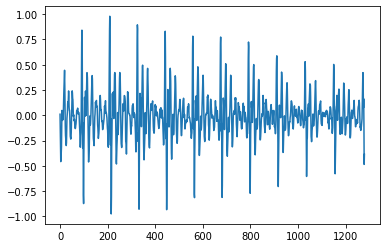

In [ ]:
plt.plot(np.arange(len(middle_frame)), middle_frame)
plt.show()

In [ ]:
len(middle_frame) / (sample_rate * 0.03)

2.6666666666666665

In [ ]:
np_middle_frame = np.array(middle_frame)
fft_vectors = fft(np_middle_frame, sample_rate, 2048)
fft_vectors.shape

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=480
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=320
  n_fft, y.shape[-1]


(1025, 1)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


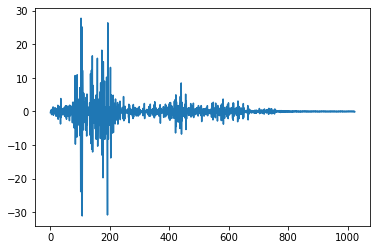

In [ ]:
plt.plot(np.arange(fft_vectors.shape[0]), fft_vectors)

In [ ]:
all_directories = iterator_for_all_sub_directories(SAMPLE_DIR)

In [ ]:
result = {"a":[], "e":[], "i":[], "o":[], "u":[]}
for vowel in all_directories:
  for file_path in all_directories[vowel]:
    sample_rate, signal = wavfile.read(file_path)
    splitted_file_path = file_path.split('/')
    label = splitted_file_path[-1].split('.')[0]
    voice_frames = voice_segment(signal, sample_rate, 0.01, "short_term_energy")
    middle_frame = get_middle_frame(voice_frames)
    middle_frame = np.array(middle_frame)
    fft_vectors = fft(middle_frame, sample_rate, 2048)
    result[label].append(fft_vectors)
for label in result:
  for i in range(1, len(result[label])):
    result[label][0] += result[label][i]
a = []
e = []
i = []
o = []
u = []
for label in result:
  result[label][0] /= len(result[label])
  if label == 'a':
    a = result[label][0]
  elif label == 'e':
    e = result[label][0]
  elif label == 'i':
    i = result[label][0]
  elif label == 'o':
    o = result[label][0]
  else:
    u = result[label][0]


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=480
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=320
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=160
  n_fft, y.shape[-1]


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


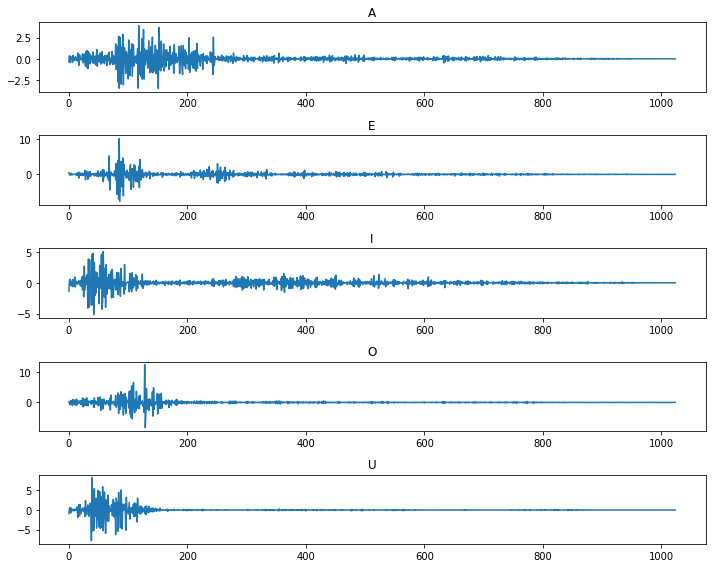

In [ ]:
fig = plt.figure(figsize=(10,8))
axs = fig.subplots(nrows=5)
axs[0].plot(np.arange(len(a)), a)
axs[0].set_title("A")
axs[1].plot(np.arange(len(e)), e)
axs[1].set_title("E")
axs[2].plot(np.arange(len(i)), i)
axs[2].set_title("I")
axs[3].plot(np.arange(len(o)), o)
axs[3].set_title("O")
axs[4].plot(np.arange(len(u)), u)
axs[4].set_title("U")
fig.tight_layout()
plt.show()



**Confusion Matrix**

In [ ]:
TEST_DIR = '/content/drive/MyDrive/Datasets/NguyenAmKiemThu-16k'
test_directories = iterator_for_all_sub_directories(TEST_DIR)

In [ ]:
weights = {"a":[], "e":[], "o":[], "i":[], "u":[]}
weights["a"] = a
weights["e"] = e
weights["o"] = o
weights["i"] = i
weights["u"] = u

In [ ]:
confusion_values = {"a_a":0, "a_e":0, "a_i":0, "a_o":0, "a_u":0,
                    "e_a":0, "e_e":0, "e_i":0, "e_o":0, "e_u":0,
                    "i_a":0, "i_e":0, "i_i":0, "i_o":0, "i_u":0,
                    "o_a":0, "o_e":0, "o_i":0, "o_o":0, "o_u":0,
                    "u_a":0, "u_e":0, "u_i":0, "u_o":0, "u_u":0}
for vowel in test_directories:
  for file_path in test_directories[vowel]:
    label = vowel.split(".")[0]
    sample_rate, signal = wavfile.read(file_path)
    normalized_signal = signal / np.max(signal)
    voice_frames = voice_segment(normalized_signal, sample_rate, 0.01, "short_term_energy")
    middle_frame = get_middle_frame(voice_frames)
    middle_frame = np.array(middle_frame)
    fft_vectors = fft(middle_frame, sample_rate, 2048)
    distances = []
    distances.append(euclidean_distance(fft_vectors, a))
    distances.append(euclidean_distance(fft_vectors, e))
    distances.append(euclidean_distance(fft_vectors, i))
    distances.append(euclidean_distance(fft_vectors, o))
    distances.append(euclidean_distance(fft_vectors, u))
    min_index = argmin(distances)
    predicted_value = ""
    if min_index == 0:
      predicted_value = "a"
    elif min_index == 1:
      predicted_value = "e"
    elif min_index == 2:
      predicted_value = "i"
    elif min_index == 3:
      predicted_value = "o"
    else:
      predicted_value = "u"
    confusion_values[f'{label}_{predicted_value}'] += 1

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=480
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=320
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=160
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: WavFileWarning: Chunk (non-data) not understood, skipping it.
  if __name__ == '__main__':


In [ ]:
confusion_matrix = generate_confusion_matrix(confusion_values)
confusion_matrix

array([[ 0.,  2., 12.,  6.,  1.],
       [ 0.,  8.,  8.,  0.,  5.],
       [ 0.,  2., 14.,  1.,  4.],
       [ 0.,  5.,  5.,  8.,  3.],
       [ 0.,  1.,  8.,  3.,  9.]])

In [ ]:
def get_accuracy(confusion_matrix):
  number_of_accuracy = 0
  for i in range(confusion_matrix.shape[0]):
    number_of_accuracy += confusion_matrix[i][i]
  return number_of_accuracy / 105

In [ ]:
accuracy = get_accuracy(confusion_matrix)
accuracy

0.37142857142857144

**Bai 3**

In [ ]:
def mfcc(middle_frames, sample_rate):
  result = []
  count  = 1
  frame_size = int(0.03 * sample_rate)
  start = 0
  end = frame_size
  while end < middle_frames.shape[0]:
    temp_frame = middle_frames[start:end]
    result.append(librosa.feature.mfcc(temp_frame, sample_rate, n_mfcc = 13))
    start += frame_size
    end += frame_size
    count += 1
  if (end - frame_size) < middle_frames.shape[0]:
    start = end - frame_size
    end = len(middle_frames)
    temp_frame = middle_frames[start:end]
    result.append(librosa.feature.mfcc(temp_frame, sample_rate, n_mfcc = 13))
  for i in range(1, len(result)):
    result[0] += result[i]
  return result[0] / count

In [ ]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    X3 = X[label == 3, :]
    X4 = X[label == 4, :]

    plt.rcParams["figure.figsize"] = (10,8)
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)
    plt.plot(X3[:, 0], X3[:, 1], '1', markersize = 4, alpha = .8)
    plt.plot(X4[:, 0], X4[:, 1], '2', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()

In [84]:
result = {"a":[], "e":[], "i":[], "o":[], "u":[]}
for vowel in all_directories:
  for file_path in all_directories[vowel]:
    sample_rate, signal = wavfile.read(file_path)
    splitted_file_path = file_path.split('/')
    label = splitted_file_path[-1].split('.')[0]
    voice_frames = voice_segment(signal, sample_rate, 0.01, "short_term_energy")
    middle_frame = get_middle_frame(voice_frames)
    middle_frame = np.array(middle_frame)
    fft_vectors = mfcc(middle_frame, sample_rate)
    result[label].append(fft_vectors)
a = []
e = []
i = []
o = []
u = []
for label in result:
  if label == 'a':
    for value in result[label]:
      a.append(value)
  elif label == 'e':
    for value in result[label]:
      e.append(value)
  elif label == 'i':
    for value in result[label]:
      i.append(value)
  elif label == 'o':
    for value in result[label]:
      o.append(value)
  else:
    for value in result[label]:
      u.append(value)

In [60]:
print(a[0].shape)

(13, 1)


In [64]:
from sklearn.cluster import KMeans
import pandas as pd
np_a = np.array(a).reshape(21, 13)
df = pd.DataFrame(np_a)
df.reset_index(drop=True, inplace=True)
print(df)
kmeans = KMeans(n_clusters=5, random_state=0).fit(np_a)

            0           1           2          3          4          5   \
0   -49.262429  114.890343  -86.603126 -24.466693  -8.212717  17.329919   
1    -9.590353   76.245522  -61.857304  -9.828414 -43.445708  31.023115   
2   -23.643061  112.292592  -86.142288 -26.130776 -38.558973  14.235551   
3   -59.922668  101.594836  -91.579595  11.267311 -17.072207   6.484842   
4   -31.719530   77.508612  -64.637484 -37.759165 -13.612898  26.989209   
5   -33.700316   70.645227  -38.367883 -34.584492  11.147438  -0.506403   
6    -1.969057  139.523855  -68.798347  -9.454115 -17.190164   4.927167   
7   -87.541910  124.582482  -93.522861 -46.605788 -20.392443  -3.554222   
8   -82.612884  138.551450 -111.195240  -0.879517  -2.582540 -19.676982   
9   -31.543977  101.463423  -15.305883 -66.388582 -11.306224   8.302715   
10  -66.287023  154.224532  -85.045387 -35.403065  -9.766922  13.702706   
11 -122.722887  117.374149  -62.478616 -14.125704 -11.637997   9.598718   
12  -25.907834   90.33308

In [ ]:
print(kmeans.cluster_centers_)

[[-14.27831729  64.27549121 -52.43727244  -5.16690608 -36.99333631
   32.57335719 -27.94286594   4.89926181   1.54135739  14.10314645
   -6.08957501  -1.89436563  -6.98671705]
 [-52.34516591  97.71713888 -77.02084339 -27.81006514 -11.25894676
   22.72924427 -24.60924356  26.7920438   -4.09554731  23.38113085
   -8.07068098  -5.86849273 -13.51241622]
 [-90.9653729  138.67252251 -85.43485769 -26.99118823  -8.22935601
   -2.1642343    3.20489448   8.32557255   0.26233851  11.77953366
   -1.14425713  -8.96425363 -11.89267025]
 [-33.56100562  93.47618346 -30.72671555 -42.27935827  -3.96572282
   10.9646488  -14.21587993  15.02024758  -7.72482187   4.17896784
   -8.58435268  14.97565682 -21.50387382]
 [-29.76603289 113.87697334 -85.72966942 -11.5717383  -14.83516376
    8.50069185   0.9439421   -8.58249691   5.95381093   7.31584974
  -12.24850766   7.94536487 -11.48529603]]


In [ ]:
pred_label = kmeans.predict(np_a)

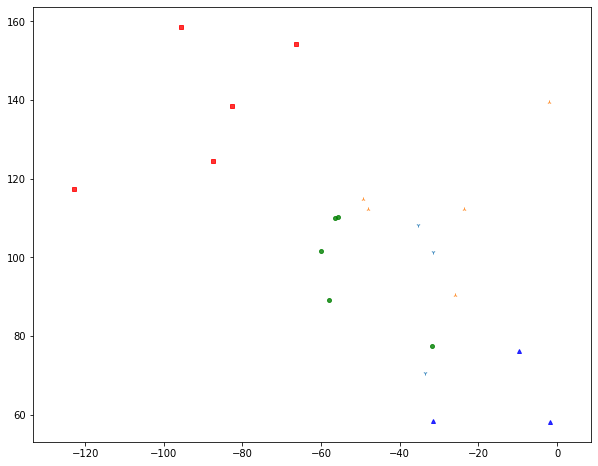

In [ ]:
kmeans_display(np_a, pred_label)

In [56]:
def kmeans_distances(mfcc_vectors, k):
  mfcc_vectors = np.array(mfcc_vectors).reshape(21, 13)
  kmeans = KMeans(n_clusters=k, random_state=0).fit(mfcc_vectors)
  return kmeans.cluster_centers_

In [79]:
k = 2
distances_a = kmeans_distances(a, k)
distances_e = kmeans_distances(e, k)
distances_i = kmeans_distances(i, k)
distances_o = kmeans_distances(o, k)
distances_u = kmeans_distances(u, k)

In [80]:
count = 0
for vowel in test_directories:
  for file_path in test_directories[vowel]:
    result = []
    label = splitted_file_path[-1].split('.')[0]
    sample_rate, signal = wavfile.read(file_path)
    normalized_signal = signal / np.max(signal)
    voice_frames = voice_segment(normalized_signal, sample_rate, 0.01, "short_term_energy")
    middle_frame = get_middle_frame(voice_frames)
    middle_frame = np.array(middle_frame)
    mfcc_vector = mfcc(middle_frame, sample_rate)
    for distance in distances_a:
      result.append(abs(np.mean(mfcc_vector) - np.mean(distance)))
    for distance in distances_e:
      result.append(abs(np.mean(mfcc_vector) - np.mean(distance)))
    for distance in distances_i:
      result.append(abs(np.mean(mfcc_vector) - np.mean(distance)))
    for distance in distances_o:
      result.append(abs(np.mean(mfcc_vector) - np.mean(distance)))
    for distance in distances_u:
      result.append(abs(np.mean(mfcc_vector) - np.mean(distance)))
    min_index = argmin(result)
    predicted_value = ""
    if (min_index // k) == 0:
      predicted_value = "a"
    elif (min_index // k) == 1:
      predicted_value = "e"
    elif (min_index // k) == 2:
      predicted_value = "i"
    elif (min_index // k) == 3:
      predicted_value = "o"
    elif (min_index // k) == 4:
      predicted_value = "u"
    if predicted_value == label:
      count += 1
print(count)

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=480
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=320
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=160
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  


17
